In [249]:
import pandas as pd
import numpy as np
from sklearn import metrics #importing the metrics
from sklearn.metrics import classification_report



df = pd.read_csv(r'C:\Users\Dell\Music\dataset.txt', sep=",", header=None)


In [106]:
# Renaming the target variable with a name "Target"
df.rename({18 : 'Target'}, axis=1, inplace=True)

In [107]:
#Seperating features and targets
X = df.iloc[:,0:17]
y = df['Target']

In [108]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Target
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [109]:
#It will calculate the euclidean distance b/w any two given samples
import math
def euclidianDistance(sample1, sample2, length):
    distance = 0
    for x in range(length):
        distance += pow(sample1[x] - sample2[x], 2)
    return math.sqrt(distance)

In [110]:
# Normalizing the data
from sklearn.preprocessing import scale
X = scale(X)

In [111]:
# Splitting the data into training and testing data
from sklearn.cross_validation import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 4, test_size = 0.1)


In [112]:
m_train, n_train = Xtrain.shape
m_test, n_test = Xtest.shape

In [177]:
Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)

ytrain = np.array(ytrain)
ytest = np.array(ytest)


In [156]:
import operator
import numpy as np

#It will give the index of the nearest k neighbors
def getNeighbors(train_set, test_sample, k):
    distances = []
    neighbors = []
    neighbors_dist = []
    
    for i,x in enumerate(train_set):
        dist = euclidianDistance(test_sample, x, n_test)
        distances.append([i, dist])
    
    distances.sort(key=operator.itemgetter(1))

    for x in range(k):
        neighbors.append(distances[x][0])
        neighbors_dist.append(distances[x][1])
    #print((neighbors_dist))    
    return neighbors,neighbors_dist


In [169]:
# It will give the labels of corresponding nearest k neighbors
K_idx = []
def getlabel(Xtrain, test_sample, ytrain, weighted):
    #index of k nearest neighbor
    neighbor_index,neighbor_dist= getNeighbors(Xtrain, test_sample,10)
    K_idx.append(neighbor_index)
    #labels of k nearest neighbor
    labels = []
    for i in neighbor_index:
        labels.append(ytrain[i])
    
    if weighted == 1:
        #print("weighted")
        freq1 = 0 # weighted sum of group 0  
        freq2 = 0 # weighted sum of group 1
        freq3 = 0
        freq4 = 0
        #print(labels)
        for i in range(1,len(neighbor_index)): 
            if labels[i] == 'opel':
                freq1 += (1 / (neighbor_dist[i]**2)) 

            elif labels[i] == 'saab':  
                freq2 += (1 /neighbor_dist[i]**2)

            elif labels[i] == 'bus':  
                freq3 += (1 /neighbor_dist[i]**2)

            elif labels[i] == 'van':  

                freq4 += (1 /neighbor_dist[i]**2)

        maximum = max(freq1, freq2, freq3, freq4 )

        if maximum == freq1:
            return 'opel'
        elif maximum == freq2:
            return 'saab'
        elif maximum == freq3:
            return 'bus'
        elif maximum == freq4:
            return 'van'
    
    else:
        #print("unweighted")

        # return label of test sample which is frequent in labels of k nearest neighbor
        return max(labels, key=labels.count)
    
    

#### Predicting on the test data using unweighted approach

In [170]:
y_pred = []
for testsample in np.array(Xtest):
    y_pred.append(getlabel(np.array(Xtrain), testsample, np.array(ytrain), 0))
print("Accuracy : ",metrics.accuracy_score(y_pred, np.array(ytest)))

print("\n\n",classification_report(np.array(ytest), y_pred))


Accuracy :  0.6705882352941176


              precision    recall  f1-score   support

        bus       0.78      1.00      0.88        21
       opel       0.67      0.31      0.42        26
       saab       0.40      0.62      0.49        16
        van       0.86      0.82      0.84        22

avg / total       0.69      0.67      0.65        85



### Plot

['saab' 'saab' 'saab' 'saab' 'saab' 'saab' 'opel' 'saab' 'opel' 'opel']


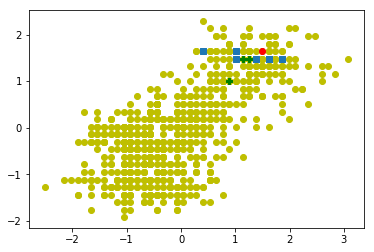

In [245]:
import matplotlib.pyplot as plt
X1 = Xtrain[K_idx[2]]

y1 = ytrain[K_idx[2]]

print(y1)


saab = np.ndarray((7,17))
opel = np.ndarray((3,17))
j = 0
k = 0
for i in range(10):
    if y1[i] == 'saab':
        saab[j] = X1[i]
        j = j+1
    elif y1[i] == 'opel':
        opel[k] = X1[i]
        k = k+1

plt.scatter(Xtrain[:,0],Xtrain[:,1],color = 'y')

plt.scatter(saab[:,0],saab[:,1],marker = 's')
plt.scatter(opel[:,0],opel[:,1],marker = 'P',color = 'g')

plt.scatter(Xtest[2,0], Xtest[2,1],color = 'r')



##### Because we have just plots two attribute in 2D it looks like the nearest neighbors(diff. color) are far away from the test data(red color)
But it is not true since we are plotting only for 2 attributes

#### Predicting on the test data using weighted approach

In [168]:
y_pred = []
for testsample in np.array(Xtest):
    y_pred.append(getlabel(np.array(Xtrain), testsample, np.array(ytrain), 1))
print("Accuracy : ",metrics.accuracy_score(y_pred, np.array(ytest)))

print("\n\n",classification_report(np.array(ytest), y_pred))


Accuracy :  0.6823529411764706


              precision    recall  f1-score   support

        bus       0.78      1.00      0.88        21
       opel       0.67      0.38      0.49        26
       saab       0.39      0.56      0.46        16
        van       0.90      0.82      0.86        22

avg / total       0.70      0.68      0.67        85



### Using in built model in sklearn

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(Xtrain,ytrain)

y_pred = knn.predict(Xtest) # predicting on training data

print("Accuracy on test data ",metrics.accuracy_score(ytest,y_pred)) # predicting accuracy on training data

print("\n\n",classification_report(ytest, y_pred))

Accuracy on test data  0.6823529411764706


              precision    recall  f1-score   support

        bus       0.75      1.00      0.86        21
       opel       0.71      0.38      0.50        26
       saab       0.42      0.62      0.50        16
        van       0.89      0.77      0.83        22

avg / total       0.71      0.68      0.67        85



In [141]:
len(Xtrain)

761

So, we have noticed that we have obtained the accuracy same in weighted approach on comparing it with an in-built model.